<a href="https://colab.research.google.com/github/gap1070/cs417-labs/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 9: Open Addressing Analysis
In this notebook you'll run experiments on your HashTableOpen class to see how linear probing behaves under different conditions.

Step 1: Paste your completed HashTableOpen class (including the _TOMBSTONE sentinel) into the cell below.

In [ ]:
_TOMBSTONE = object()


class HashTableOpen:
    """A hash table using open addressing with linear probing."""

    def __init__(self, size=10):
        """Create an empty hash table with the given number of slots."""
        self.size = size
        self.table = [None] * self.size
        self.count = 0

    # ── TODO 1: Hash Function ─────────────────────────────────────

    def _hash(self, key):
        return hash(key) % self.size

    # ── TODO 2: Put ───────────────────────────────────────────────

    def put(self, key, value):
        start = self._hash(key)

        for step in range(self.size):
            index = (start + step) % self.size
            slot = self.table[index]

            # treats the tombstones just like other empty slots
            if slot is None or slot is _TOMBSTONE:
                self.table[index] = (key, value)
                self.count += 1
                return

            # updates the existing key
            if slot[0] == key:
                self.table[index] = (key, value)
                return

        raise Exception("Hash table is full")


    # ── TODO 3: Get ───────────────────────────────────────────────

    def get(self, key):
        start = self._hash(key)

        for step in range(self.size):
            index = (start + step) % self.size
            slot = self.table[index]

            # a slot is None if it was never placed
            if slot is None:
                break

            # skips the tombstones
            if slot is _TOMBSTONE:
                continue

            if slot[0] == key:
                return slot[1]

        raise KeyError(key)

    # ── TODO 4: Delete ────────────────────────────────────────────

    def delete(self, key):
        start = self._hash(key)

        for step in range(self.size):
            index = (start + step) % self.size
            slot = self.table[index]

            # if a slots none, the key doesn't exist
            if slot is None:
                break

            # skips the tombstones
            if slot is _TOMBSTONE:
                continue

            # finds the key and replaces with tombstone
            if slot[0] == key:
                self.table[index] = _TOMBSTONE
                self.count -= 1
                return

        raise KeyError(key)

    # ── Provided Methods (do not modify) ──────────────────────────

    def __len__(self):
        """Return the number of key-value pairs in the table."""
        return self.count

    def __contains__(self, key):
        """Support 'in' operator: key in table."""
        try:
            self.get(key)
            return True
        except KeyError:
            return False

    def load_factor(self):
        """Return the current load factor (items / slots)."""
        return self.count / self.size

    def __repr__(self):
        """Show a readable view of the hash table's internal state."""
        lines = []
        for i, slot in enumerate(self.table):
            if slot is None:
                lines.append(f"  [{i}] empty")
            elif slot is _TOMBSTONE:
                lines.append(f"  [{i}] TOMBSTONE")
            else:
                k, v = slot
                lines.append(f"  [{i}] {k!r}: {v!r}")
        return f"HashTableOpen({self.count} items, {self.size} slots):\n" + "\n".join(lines)

Experiment 1: Counting Probes
How many probes (slot checks) does it take to insert items as the table fills up?

Run the cell below. It inserts random keys into a table of size 100 and tracks how many probes each put requires. The chart shows how probe count grows as load factor increases.

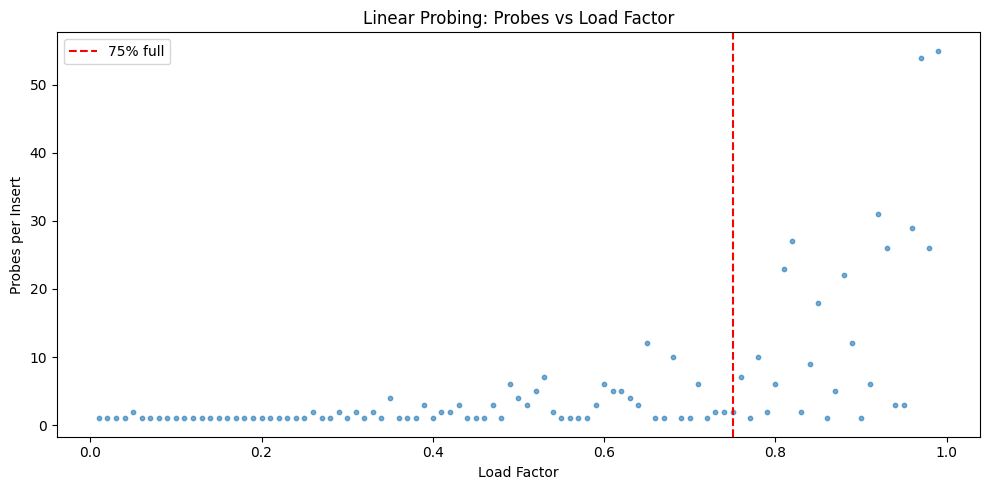

Average probes at <50% load: 1.4
Average probes at >75% load: 15.8


In [3]:
_TOMBSTONE = object()


class HashTableOpen:
    """A hash table using open addressing with linear probing."""

    def __init__(self, size=10):
        """Create an empty hash table with the given number of slots."""
        self.size = size
        self.table = [None] * self.size
        self.count = 0

    # ── TODO 1: Hash Function ─────────────────────────────────────

    def _hash(self, key):
        return hash(key) % self.size

    # ── TODO 2: Put ───────────────────────────────────────────────

    def put(self, key, value):
        start = self._hash(key)

        for step in range(self.size):
            index = (start + step) % self.size
            slot = self.table[index]

            # treats the tombstones just like other empty slots
            if slot is None or slot is _TOMBSTONE:
                self.table[index] = (key, value)
                self.count += 1
                return

            # updates the existing key
            if slot[0] == key:
                self.table[index] = (key, value)
                return

        raise Exception("Hash table is full")


    # ── TODO 3: Get ───────────────────────────────────────────────

    def get(self, key):
        start = self._hash(key)

        for step in range(self.size):
            index = (start + step) % self.size
            slot = self.table[index]

            # a slot is None if it was never placed
            if slot is None:
                break

            # skips the tombstones
            if slot is _TOMBSTONE:
                continue

            if slot[0] == key:
                return slot[1]

        raise KeyError(key)

    # ── TODO 4: Delete ────────────────────────────────────────────

    def delete(self, key):
        start = self._hash(key)

        for step in range(self.size):
            index = (start + step) % self.size
            slot = self.table[index]

            # if a slots none, the key doesn't exist
            if slot is None:
                break

            # skips the tombstones
            if slot is _TOMBSTONE:
                continue

            # finds the key and replaces with tombstone
            if slot[0] == key:
                self.table[index] = _TOMBSTONE
                self.count -= 1
                return

        raise KeyError(key)

    # ── Provided Methods (do not modify) ──────────────────────────

    def __len__(self):
        """Return the number of key-value pairs in the table."""
        return self.count

    def __contains__(self, key):
        """Support 'in' operator: key in table."""
        try:
            self.get(key)
            return True
        except KeyError:
            return False

    def load_factor(self):
        """Return the current load factor (items / slots)."""
        return self.count / self.size

    def __repr__(self):
        """Show a readable view of the hash table's internal state."""
        lines = []
        for i, slot in enumerate(self.table):
            if slot is None:
                lines.append(f"  [{i}] empty")
            elif slot is _TOMBSTONE:
                lines.append(f"  [{i}] TOMBSTONE")
            else:
                k, v = slot
                lines.append(f"  [{i}] {k!r}: {v!r}")
        return f"HashTableOpen({self.count} items, {self.size} slots):\n" + "\n".join(lines)
import random
import matplotlib.pyplot as plt

def count_probes_on_put(ht, key, value):
    """Insert a key and return how many slots were checked."""
    start = ht._hash(key)
    probes = 0
    for step in range(ht.size):
        idx = (start + step) % ht.size
        probes += 1
        slot = ht.table[idx]
        if slot is None or slot is ht.__class__.__module__ and False:
            break
        if isinstance(slot, tuple) and slot[0] == key:
            break
    ht.put(key, value)
    return probes

# Run experiment
SIZE = 100
ht = HashTableOpen(size=SIZE)
load_factors = []
probe_counts = []

random.seed(42)
for i in range(SIZE - 1):  # fill to 99% (can't fill 100%)
    key = f"key_{random.randint(0, 999999)}"
    probes = count_probes_on_put(ht, key, i)
    load_factors.append(ht.load_factor())
    probe_counts.append(probes)

plt.figure(figsize=(10, 5))
plt.scatter(load_factors, probe_counts, s=10, alpha=0.6)
plt.xlabel('Load Factor')
plt.ylabel('Probes per Insert')
plt.title('Linear Probing: Probes vs Load Factor')
plt.axvline(x=0.75, color='red', linestyle='--', label='75% full')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Average probes at <50% load: {sum(p for l,p in zip(load_factors, probe_counts) if l < 0.5) / max(1, sum(1 for l in load_factors if l < 0.5)):.1f}")
print(f"Average probes at >75% load: {sum(p for l,p in zip(load_factors, probe_counts) if l > 0.75) / max(1, sum(1 for l in load_factors if l > 0.75)):.1f}")

     
Question: What happens to the number of probes once the table is more than 75% full? Why does this happen?

Your answer: Once the table is more than 75% full, the number of the probes started to increase alot. This happens because using linear probing you will suffer from clustering happening. As the probes keep incresing the clusters start to grow.

Experiment 2: Visualize the Table
Let's see what the table actually looks like at different load factors. Green = occupied, red = tombstone, gray = empty.

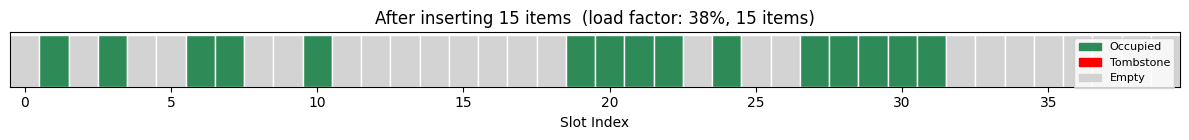

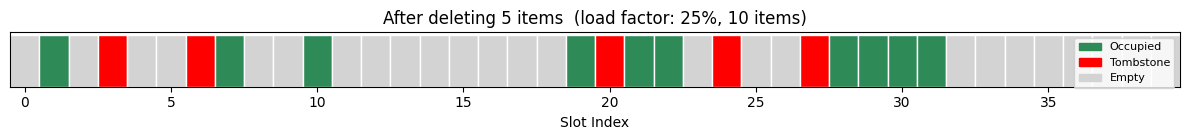

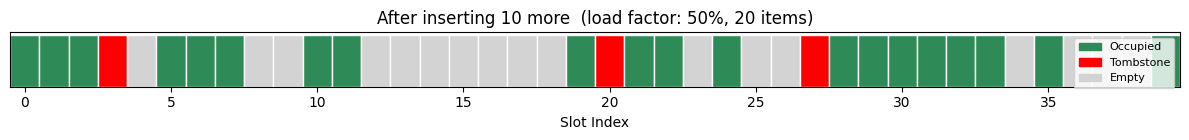

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def visualize_table(ht, title=""):
    """Show the table as a color-coded bar."""
    colors = []
    for slot in ht.table:
        if slot is None:
            colors.append('lightgray')
        elif slot is _TOMBSTONE:
            colors.append('red')
        else:
            colors.append('seagreen')

    fig, ax = plt.subplots(figsize=(12, 1.5))
    ax.bar(range(len(colors)), [1]*len(colors), color=colors, edgecolor='white', width=1.0)
    ax.set_xlim(-0.5, len(colors)-0.5)
    ax.set_yticks([])
    ax.set_xlabel('Slot Index')
    ax.set_title(f'{title}  (load factor: {ht.load_factor():.0%}, {ht.count} items)')

    legend = [
        mpatches.Patch(color='seagreen', label='Occupied'),
        mpatches.Patch(color='red', label='Tombstone'),
        mpatches.Patch(color='lightgray', label='Empty'),
    ]
    ax.legend(handles=legend, loc='upper right', fontsize=8)
    plt.tight_layout()
    plt.show()

# Build a table and visualize at different stages
SIZE = 40
ht = HashTableOpen(size=SIZE)

# Insert 15 items
random.seed(7)
keys = [f"item_{random.randint(0, 9999)}" for _ in range(15)]
for k in keys:
    ht.put(k, True)
visualize_table(ht, "After inserting 15 items")

# Delete 5 items
for k in keys[:5]:
    ht.delete(k)
visualize_table(ht, "After deleting 5 items")

# Insert 10 more
for i in range(10):
    ht.put(f"new_{i}", True)
visualize_table(ht, "After inserting 10 more")

Question: Look at the "After deleting 5 items" visualization. Do you see any clusters (groups of green slots next to each other)? Why do clusters form with linear probing?

Your answer: Yes there are a good amount of green clusters. For linear probing, clusters form by how they try to figure out collisions. When multiple keys try to hash to the same index they are just put in the next open slot. If several keys collide, they create a bunch of filled slots, This is the effct of primary clustering.

Experiment 3: Chaining vs Open Addressing
How does lookup time compare between the two approaches? We'll measure the average number of comparisons for get() at different load factors.

We provide a simple chaining implementation below to compare against your open addressing table.

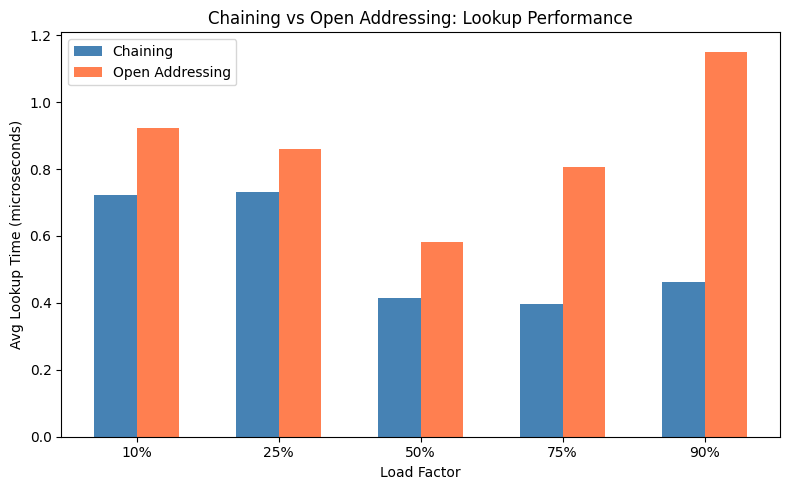

Load Factor | Chaining (us) | Open Addr (us)
---------------------------------------------
    10%      |    0.72       |    0.92
    25%      |    0.73       |    0.86
    50%      |    0.41       |    0.58
    75%      |    0.40       |    0.81
    90%      |    0.46       |    1.15


In [5]:
import time

class ChainingHashTable:
    """Simple chaining hash table for comparison."""
    def __init__(self, size=100):
        self.size = size
        self.table = [[] for _ in range(size)]
        self.count = 0

    def _hash(self, key):
        return hash(key) % self.size

    def put(self, key, value):
        bucket = self.table[self._hash(key)]
        for pair in bucket:
            if pair[0] == key:
                pair[1] = value
                return
        bucket.append([key, value])
        self.count += 1

    def get(self, key):
        for pair in self.table[self._hash(key)]:
            if pair[0] == key:
                return pair[1]
        raise KeyError(key)

# Compare lookup times at different load factors
SIZE = 1000
load_targets = [0.1, 0.25, 0.5, 0.75, 0.9]
chaining_times = []
probing_times = []

for target in load_targets:
    n_items = int(SIZE * target)
    keys = [f"k{i}" for i in range(n_items)]

    # Build both tables
    chain_ht = ChainingHashTable(size=SIZE)
    open_ht = HashTableOpen(size=SIZE)
    for k in keys:
        chain_ht.put(k, True)
        open_ht.put(k, True)

    # Time lookups
    start = time.perf_counter()
    for k in keys:
        chain_ht.get(k)
    chaining_times.append((time.perf_counter() - start) / n_items * 1_000_000)

    start = time.perf_counter()
    for k in keys:
        open_ht.get(k)
    probing_times.append((time.perf_counter() - start) / n_items * 1_000_000)

# Plot
plt.figure(figsize=(8, 5))
x = range(len(load_targets))
plt.bar([i - 0.15 for i in x], chaining_times, width=0.3, label='Chaining', color='steelblue')
plt.bar([i + 0.15 for i in x], probing_times, width=0.3, label='Open Addressing', color='coral')
plt.xticks(x, [f"{int(t*100)}%" for t in load_targets])
plt.xlabel('Load Factor')
plt.ylabel('Avg Lookup Time (microseconds)')
plt.title('Chaining vs Open Addressing: Lookup Performance')
plt.legend()
plt.tight_layout()
plt.show()

print("Load Factor | Chaining (us) | Open Addr (us)")
print("-" * 45)
for t, c, o in zip(load_targets, chaining_times, probing_times):
    print(f"    {t:.0%}      |    {c:.2f}       |    {o:.2f}")

Question: At which load factor does open addressing start to perform worse than chaining? Why does chaining handle high load factors more gracefully?

Your answer: Open addressing starts to perfom worse than chaining around 75%, and it becomes very noticable around 90%. This happens because linear probing creats a long cluster of already occupied slots. Chaining handles the heavy loads better, since the collisions are each in different buckets. So you are only searching through small lists, instead of of large clusters.